In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import numpy as np
from fitters import *
from tools import *
from plots import *
from trainer import *
from results import Results
set_seaborn()

In [31]:
resPH, stimPH = read_lmc('PHOTO')
res1, stim3 = read_lmc('LMC-BG1')
res2, stim3 = read_lmc('LMC-BG2')
res3, stim3 = read_lmc('LMC-BG3')
res4, stim4 = read_lmc('LMC-BG4')
res5, stim5 = read_lmc('LMC-BG5')
res6, stim6 = read_lmc('LMC-BG6')

TIME = 1.0


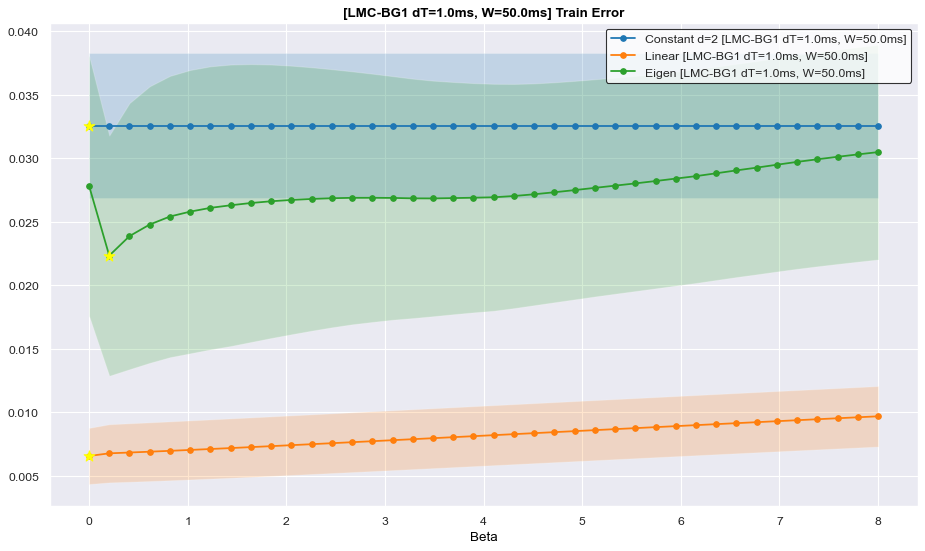

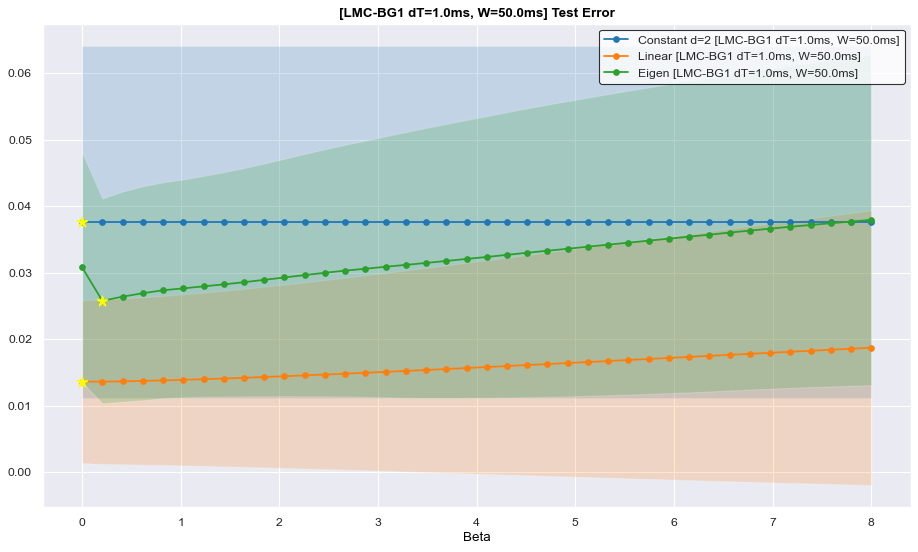

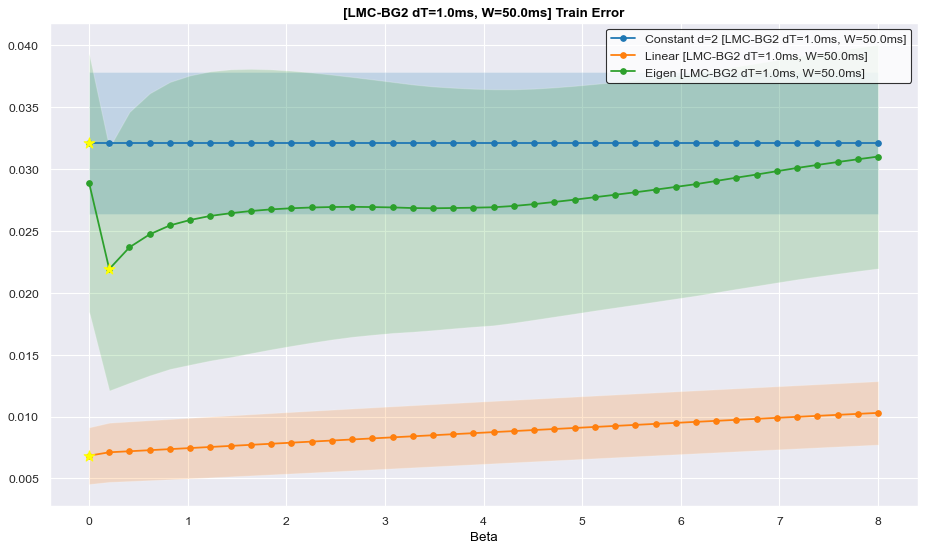

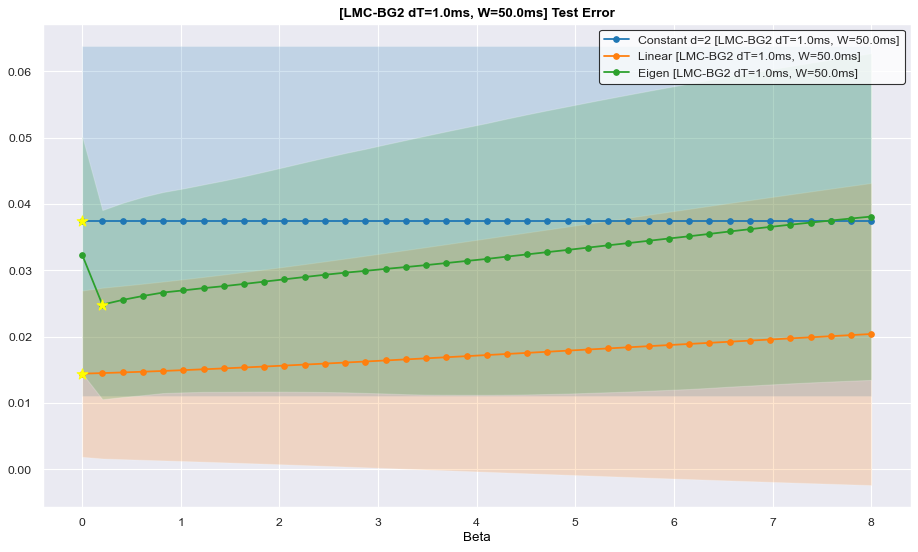

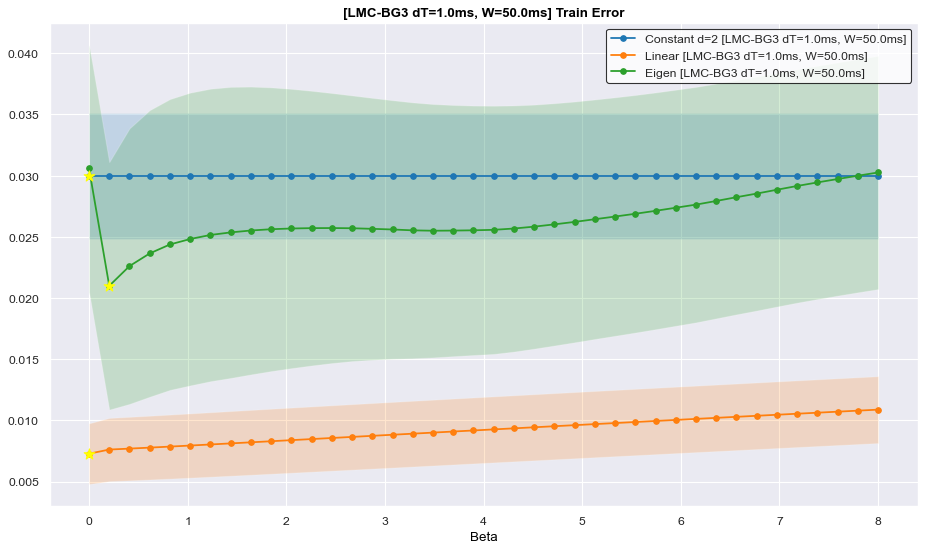

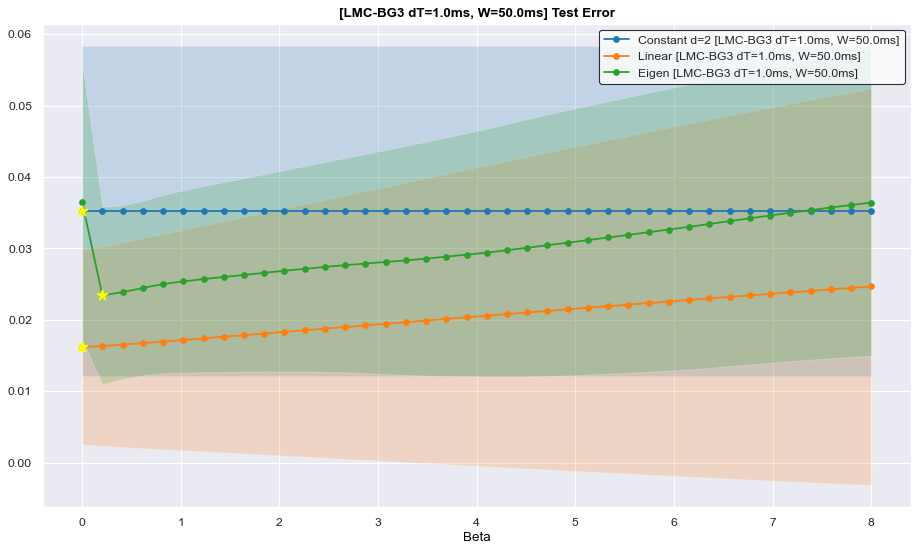

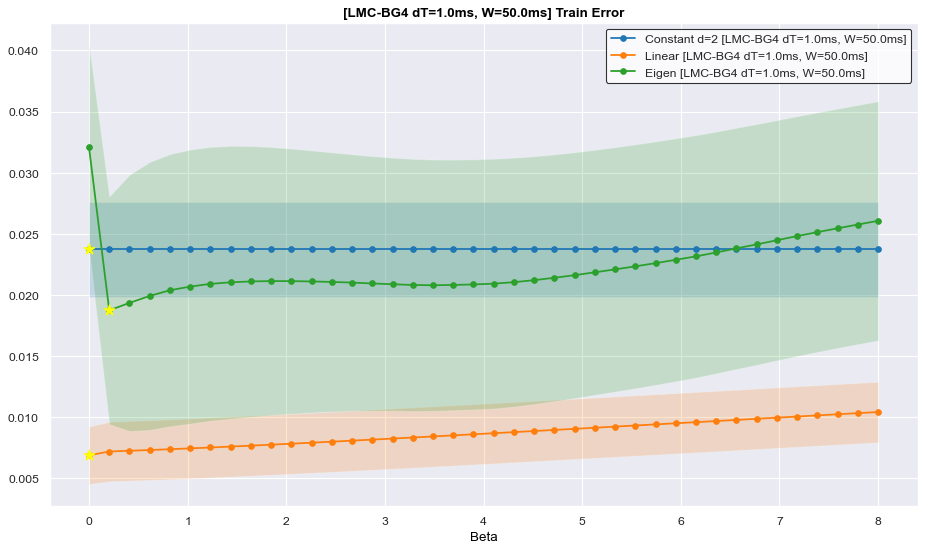

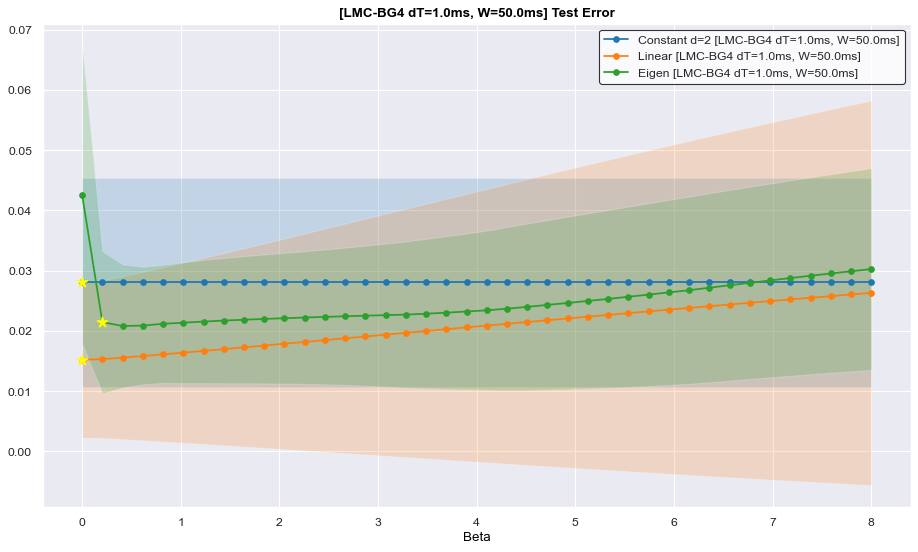

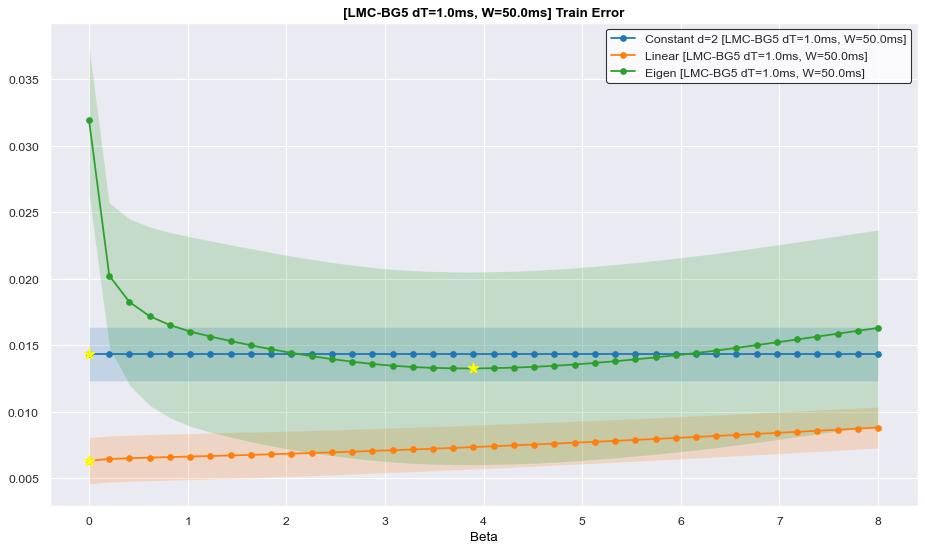

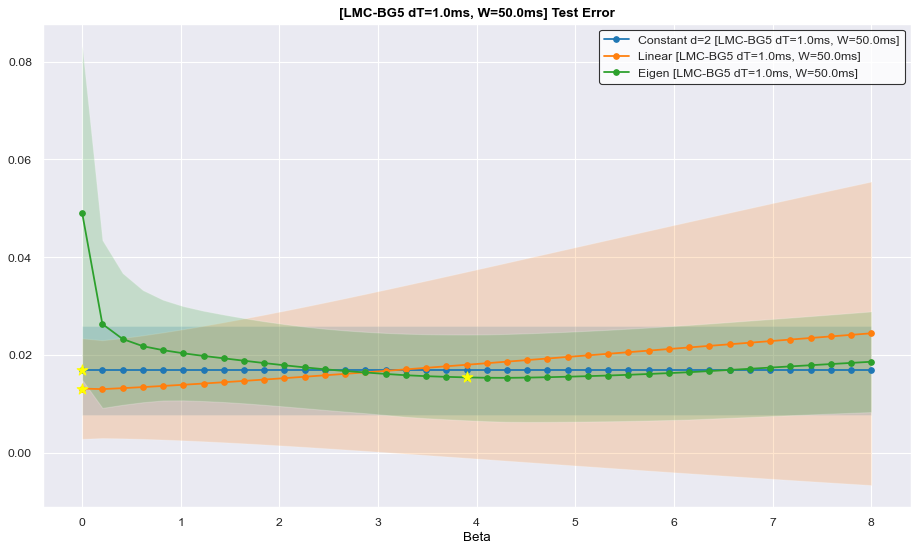

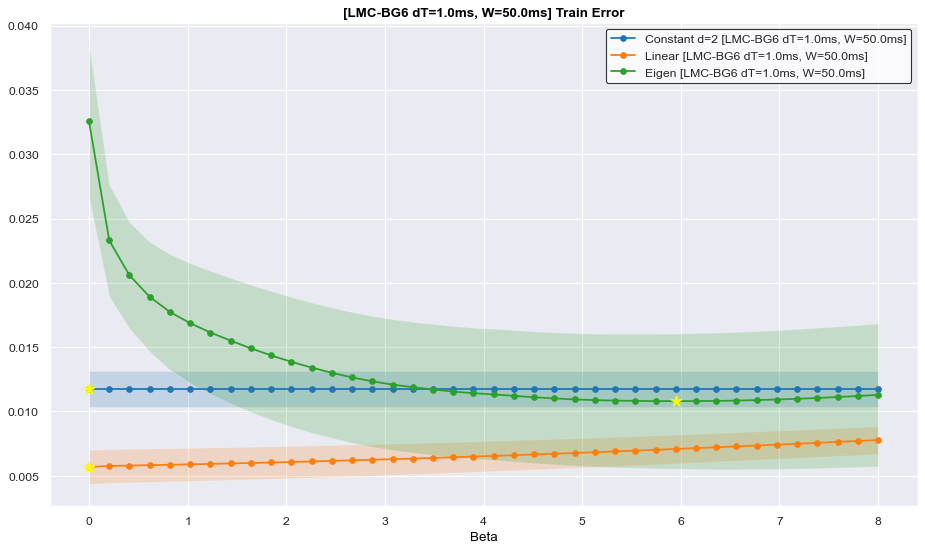

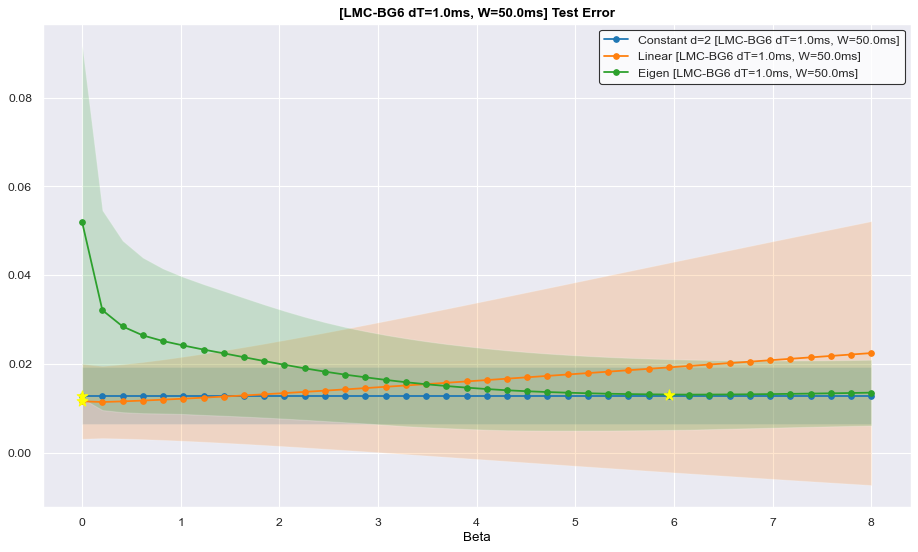

In [35]:
bg_results = []
for data_str, Y_sig in zip(['LMC-BG1','LMC-BG2','LMC-BG3','LMC-BG4','LMC-BG5','LMC-BG6'], [res1,res2,res3,res4,res5,res6]):
    d_method = 'mean'
    factor = 10
    dim = 50
    betas = np.linspace(0,8,40)
    X = preprocess(resPH, factor=factor, method=d_method)
    Y = preprocess(Y_sig, factor=factor, method=d_method) 
    time_window = round( dim*(TIME/len(X))*1000, 3)
    dT = 1/len(X)*1000
    time_str = f'dT={dT}ms, W={time_window}ms'
    title = f'[{data_str} {time_str}]'


    model = ConstantModel(f'Constant d=2 {title}')
    res = train_test_method(X, Y, model, 2, betas=betas)
    C2_Results = Results(model.name, *res)

    model = LinearModel(f'Linear {title}')
    res = train_test_method(X, Y, model, dim, betas=betas)
    Lin50_Results = Results(model.name, *res)

    model = EigenModel(f'Eigen {title}')
    res = train_test_method(X, Y, model, dim, betas=betas)
    Eig50_Results = Results(model.name, *res)

    cur_results = [C2_Results, Lin50_Results, Eig50_Results]
    bg_results.extend(cur_results)

    # plotting
    plot_beta_errs(cur_results, title=title)
    # plot_filter(*Lin50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Linear')
    # plot_filter(*Eig50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Eig')
    # plot_filter(*Lin50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Linear')
    # plot_filter(*Eig50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Eig')
    # plot_spectrum(Eig50_Results.get_avg_spectrum(), title=f'{title} beta={round(Eig50_Results.get_opt_beta(),3)}')
    # plot_self_corr(X, dim, title=title)

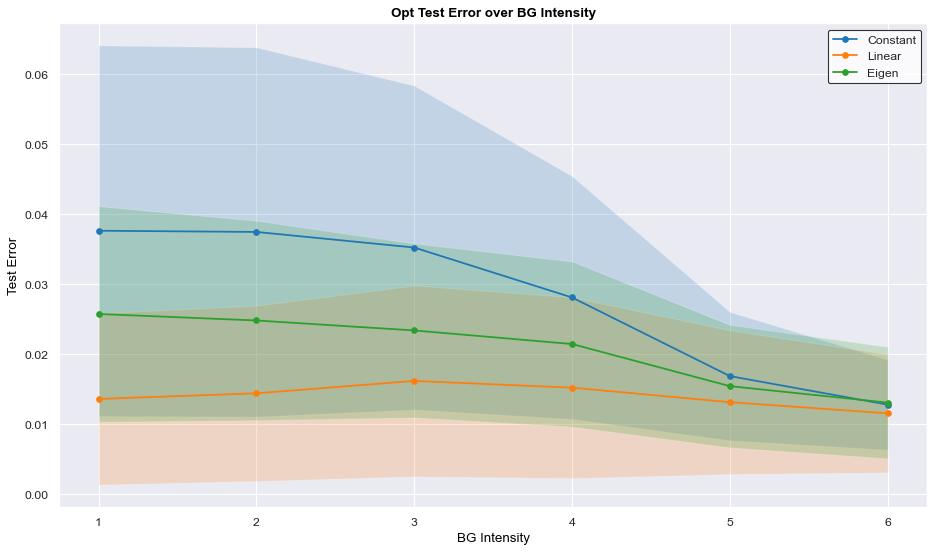

In [36]:
con = bg_results[0::3]
lin = bg_results[1::3]
eig = bg_results[2::3]

bgs = [1,2,3,4,5,6]
for i ,label in zip(range(3),['Constant', 'Linear', 'Eigen']):
    err_std = [r.get_opt_test_err() for r in  bg_results[i::3]]
    errs, stds = np.array([x[0] for x in err_std]), np.array([x[1] for x in err_std])
    plt_errors(bgs, errs, stds, marker='.', label=label)
plt.legend(); plt.title('Opt Test Error over BG Intensity'); 
plt.ylabel('Test Error'); plt.xlabel('BG Intensity'); plt.xticks(bgs); plt.show()


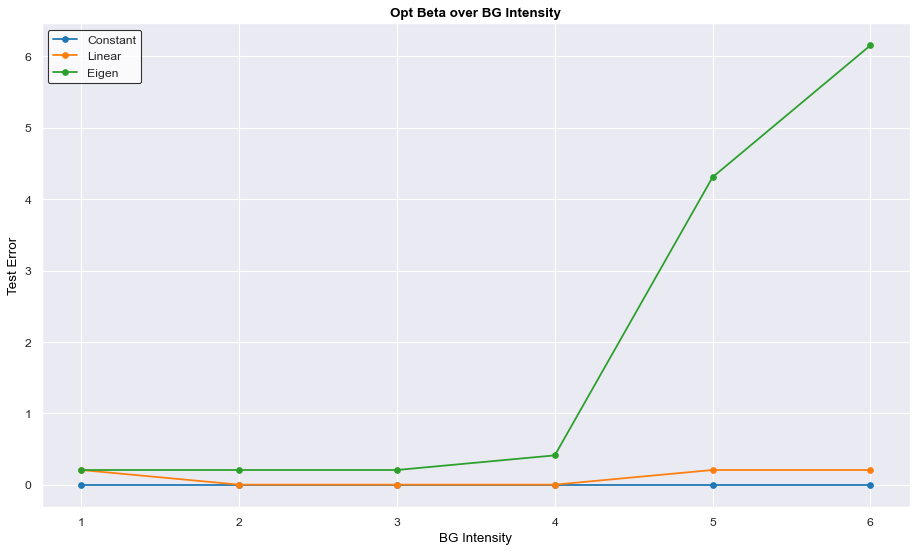

In [38]:
con = bg_results[0::3]
lin = bg_results[1::3]
eig = bg_results[2::3]

bgs = [1,2,3,4,5,6]
for i ,label in zip(range(3),['Constant', 'Linear', 'Eigen']):
    o_betas = [r.get_opt_beta(opt_set='test') for r in  bg_results[i::3]]
    plt.plot(bgs, o_betas, marker='.', label=label)
plt.legend(); plt.title('Opt Beta over BG Intensity'); 
plt.ylabel('Test Error'); plt.xlabel('BG Intensity'); plt.xticks(bgs); plt.show()


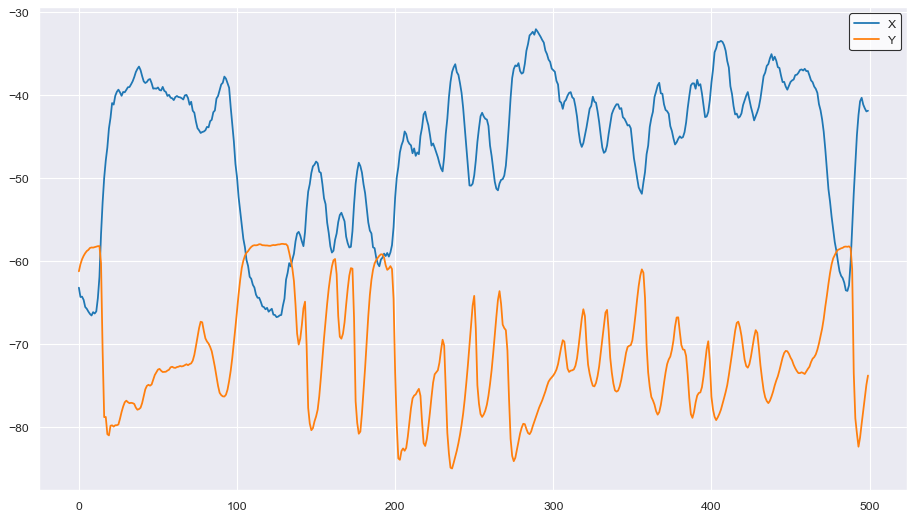

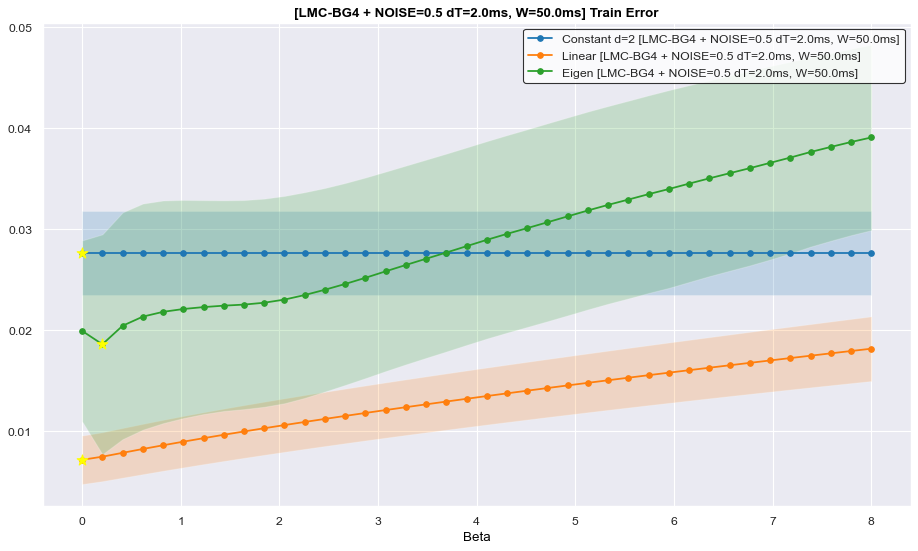

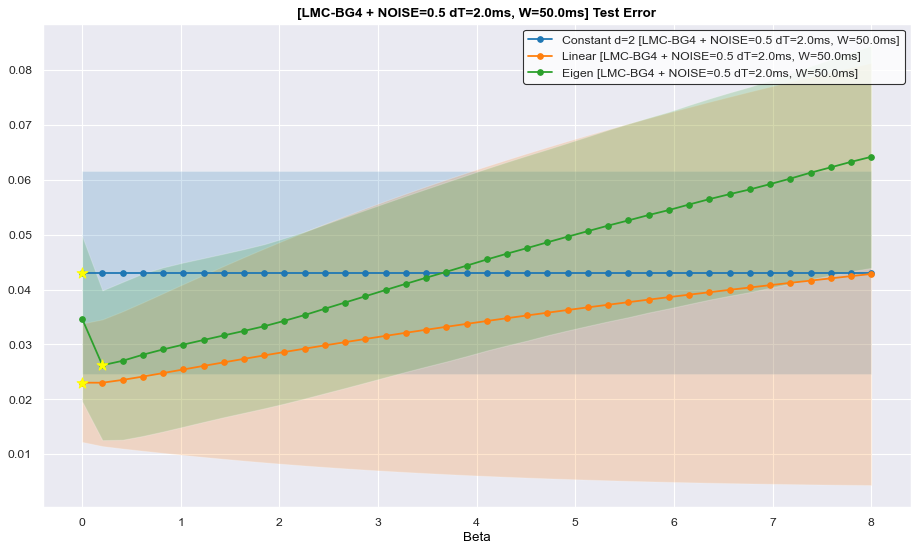

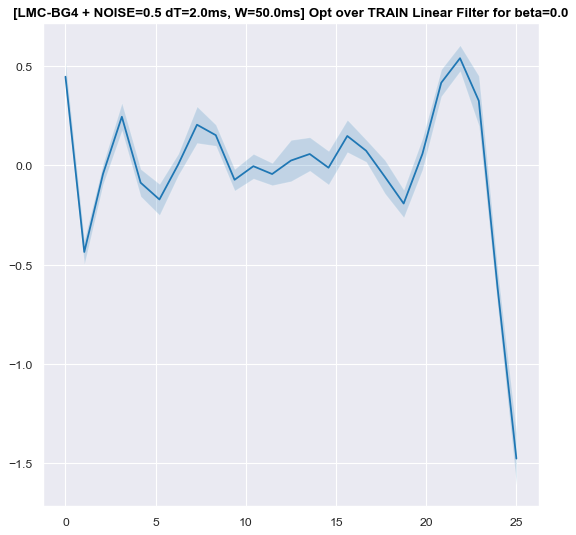

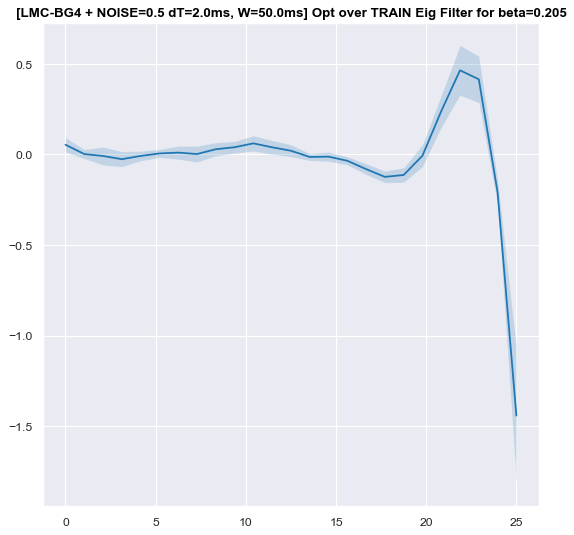

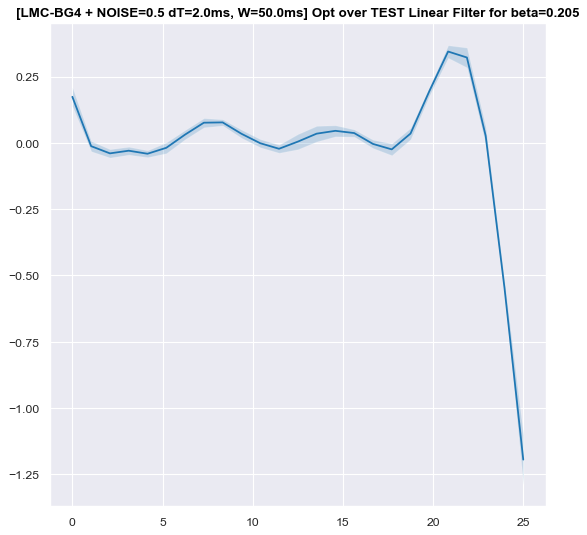

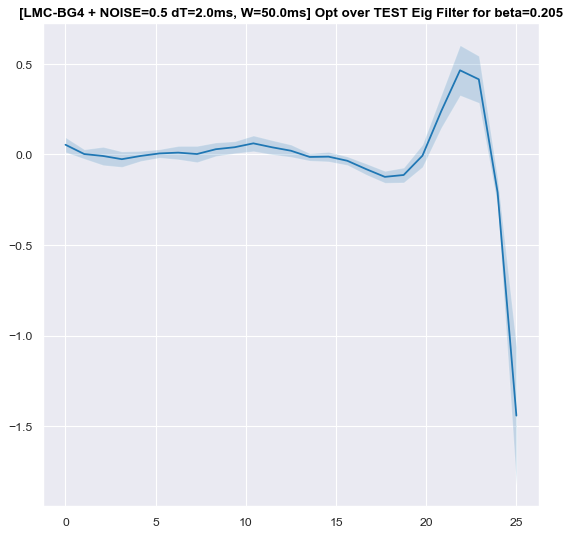

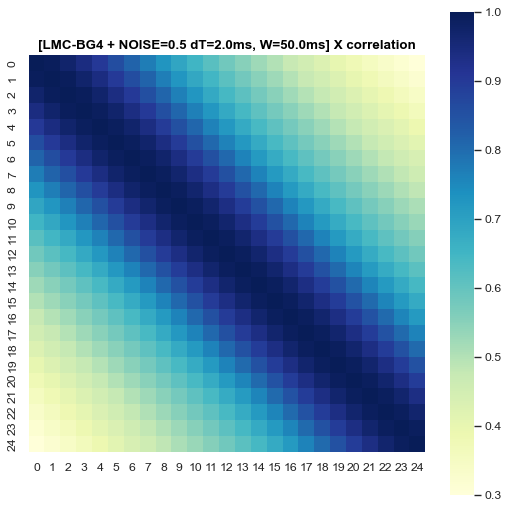

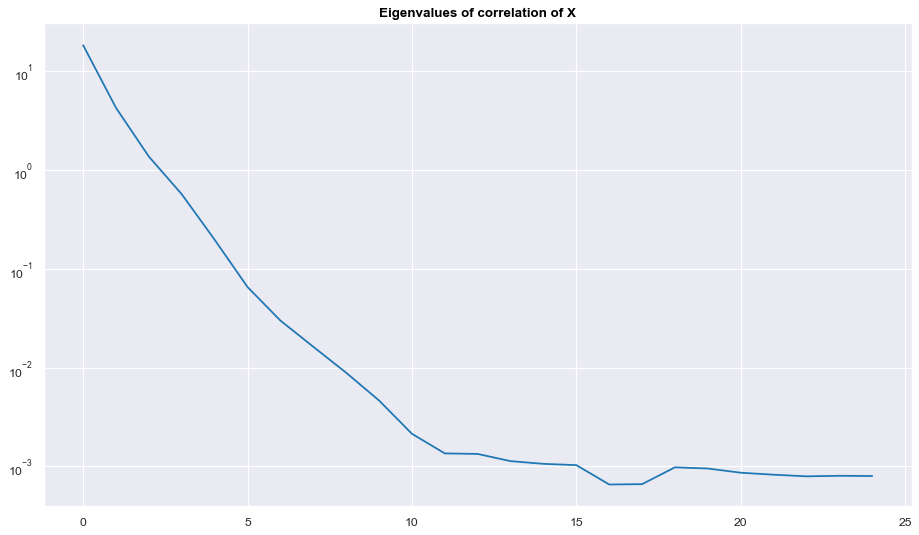

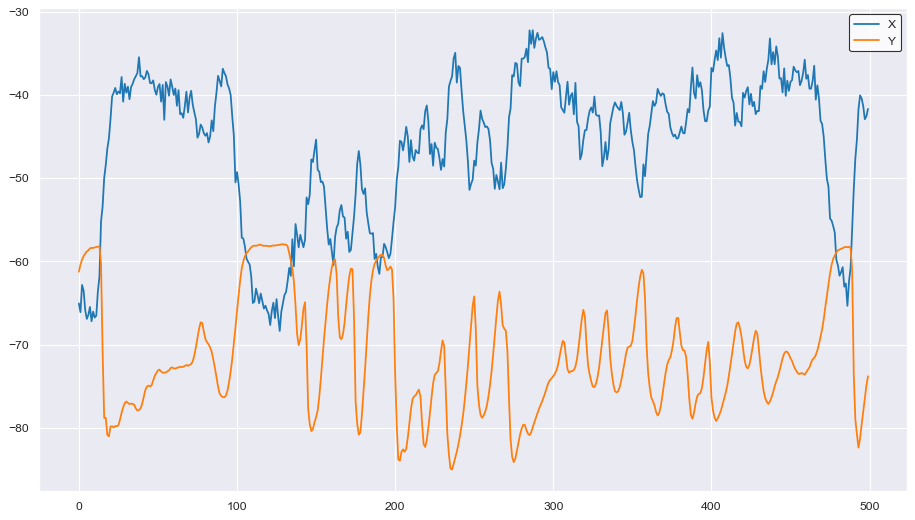

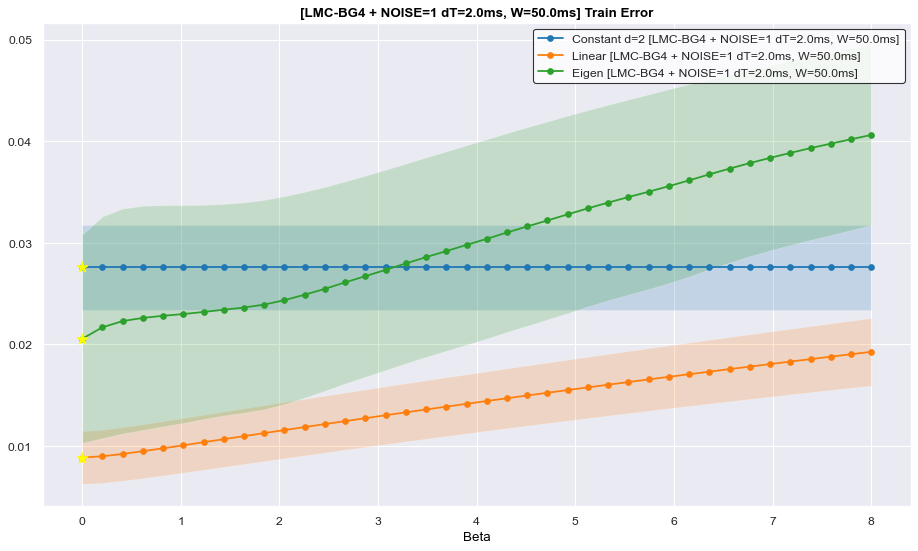

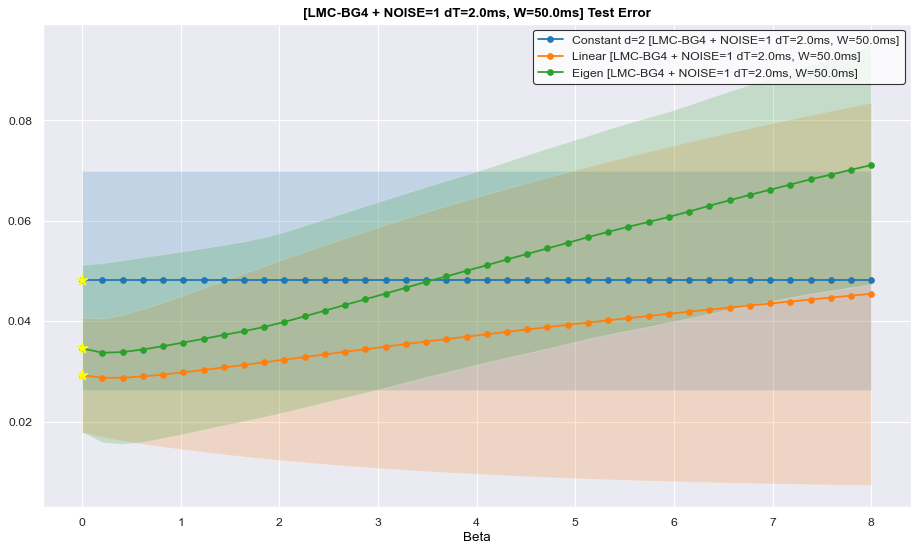

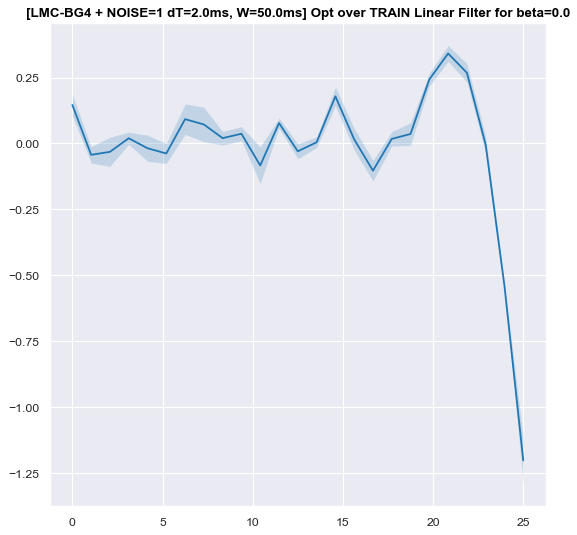

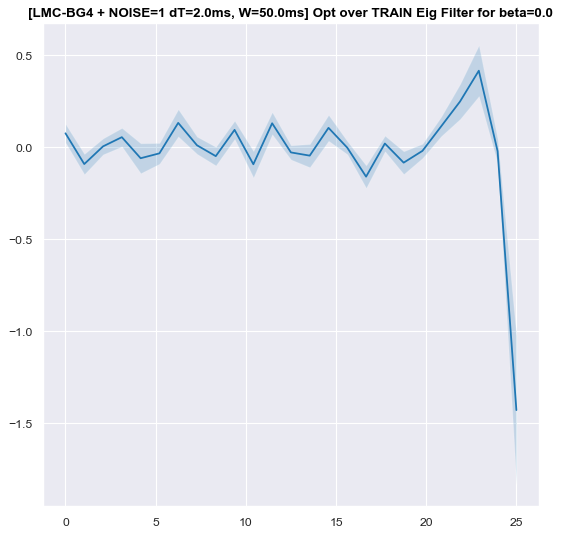

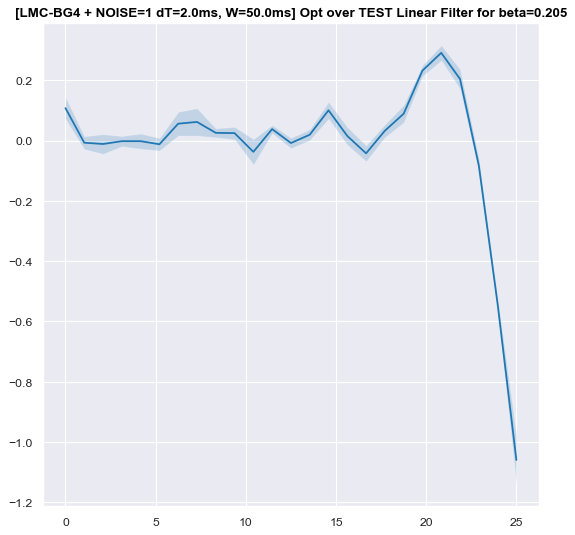

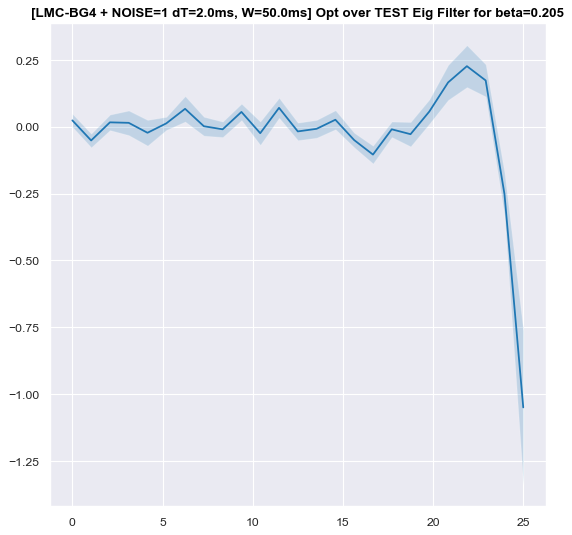

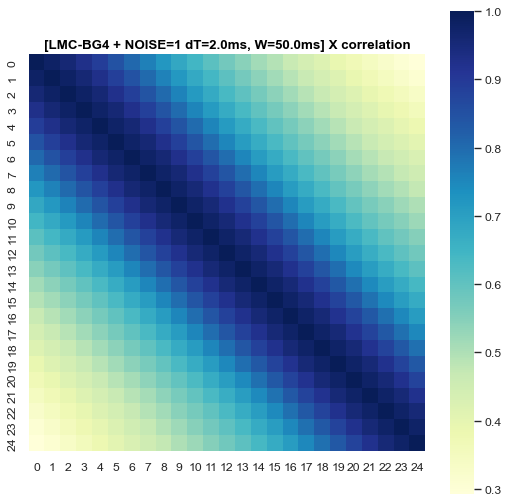

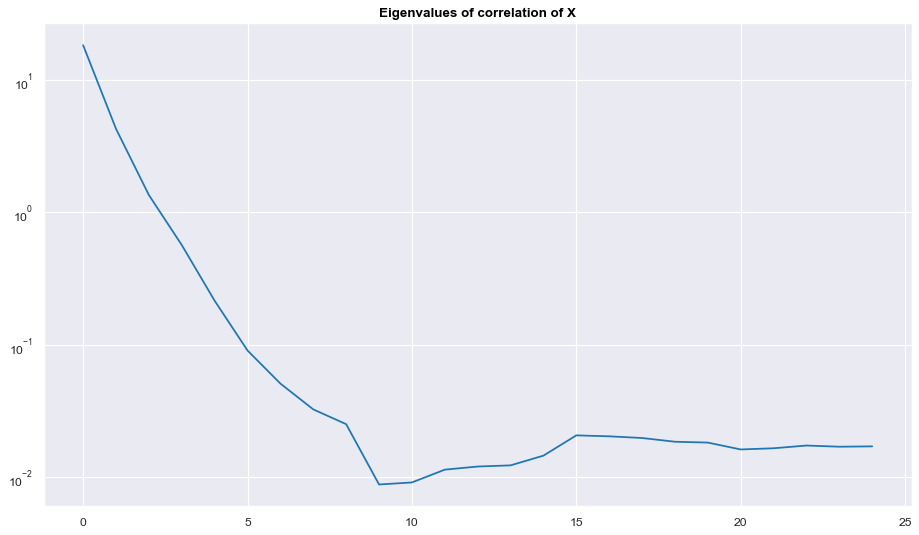

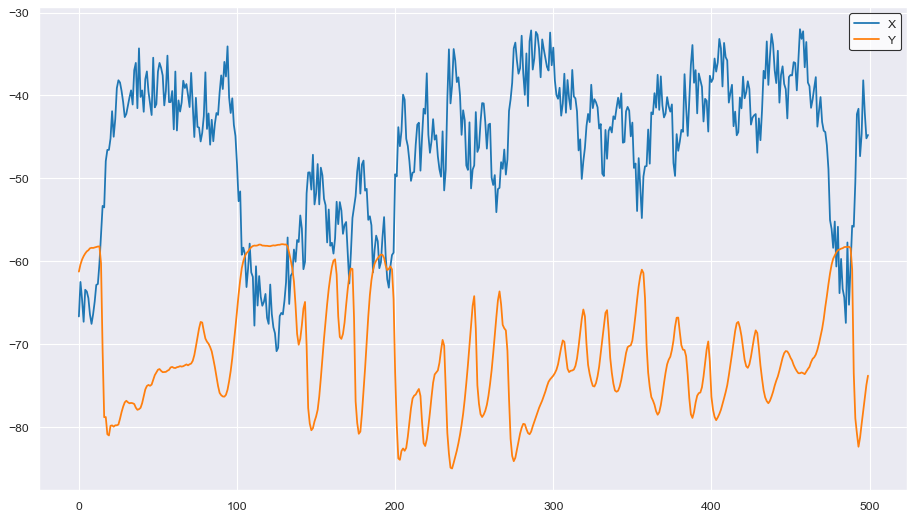

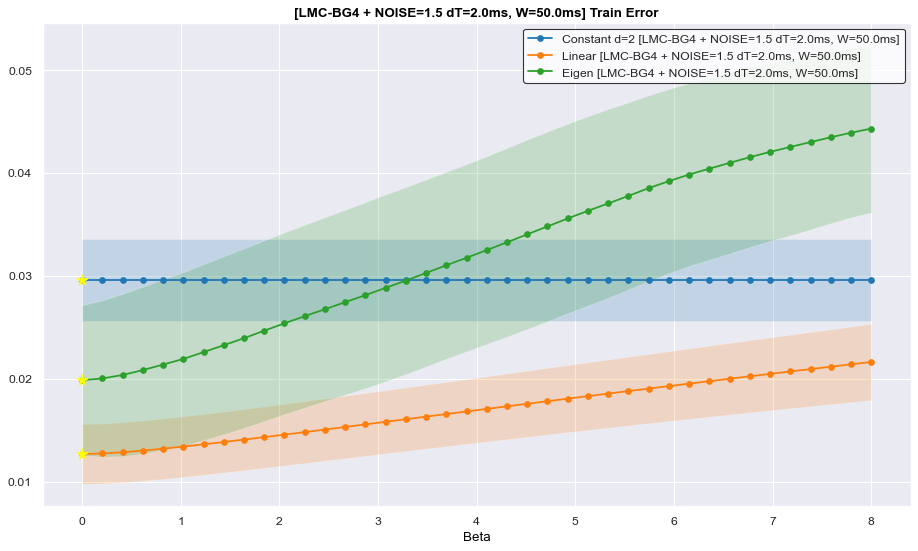

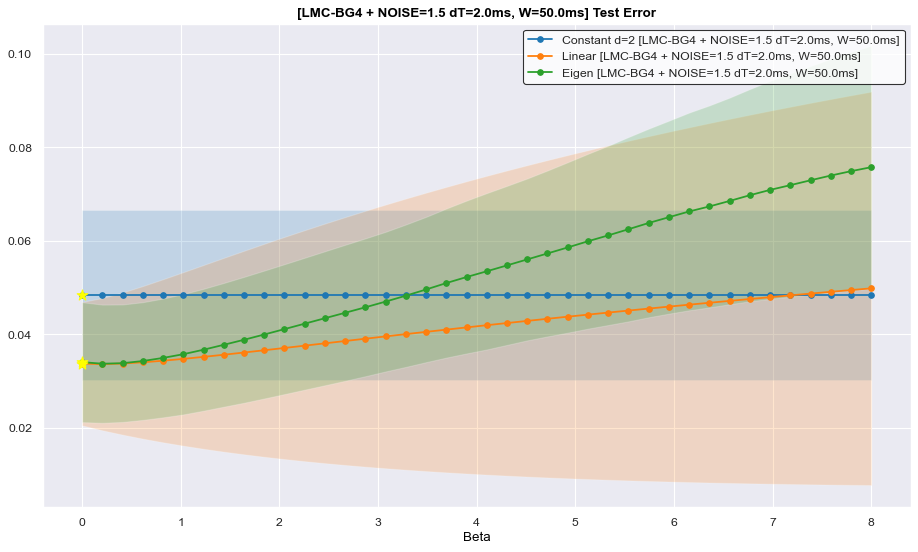

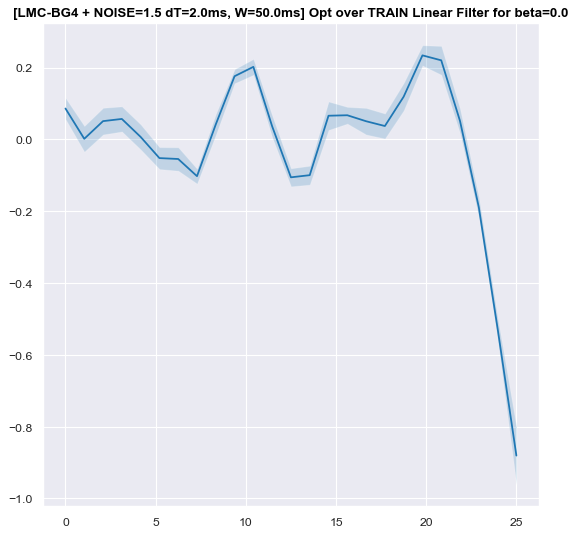

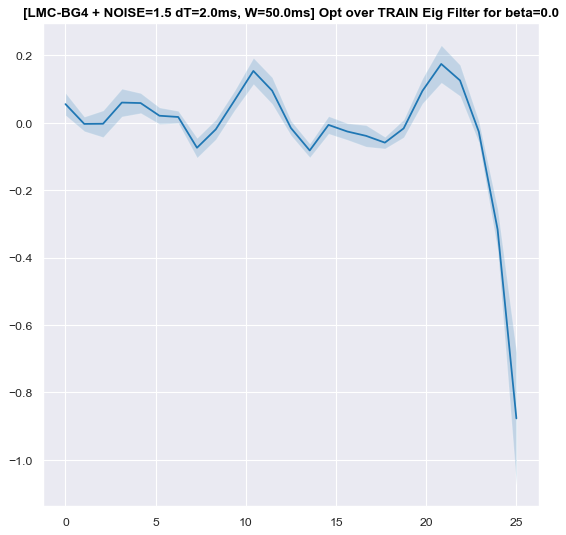

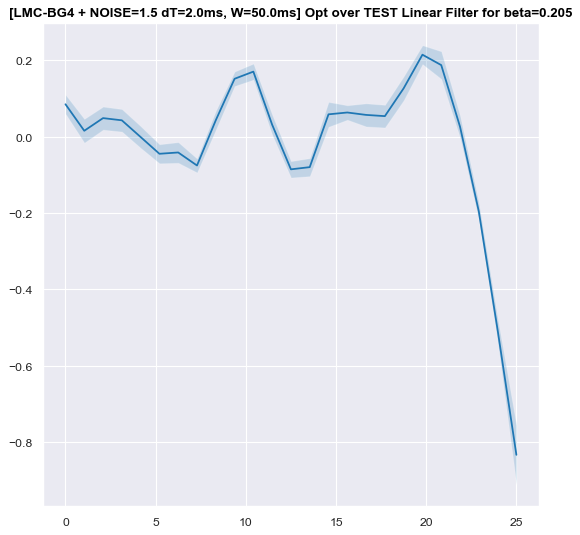

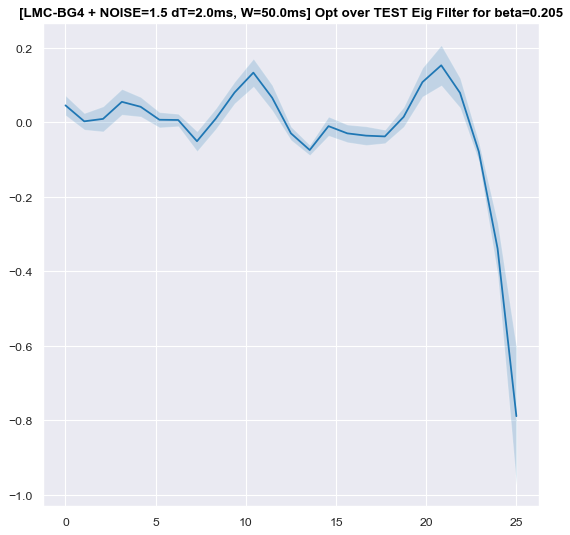

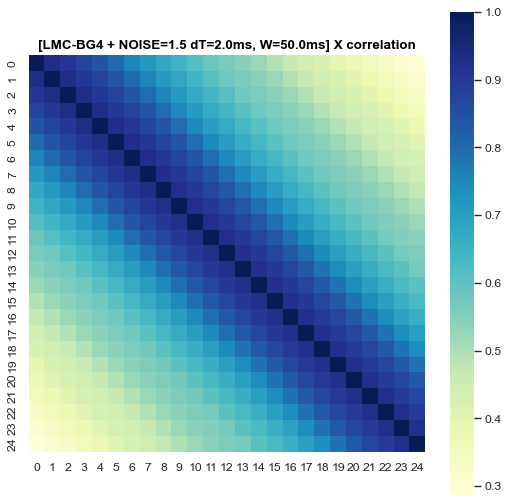

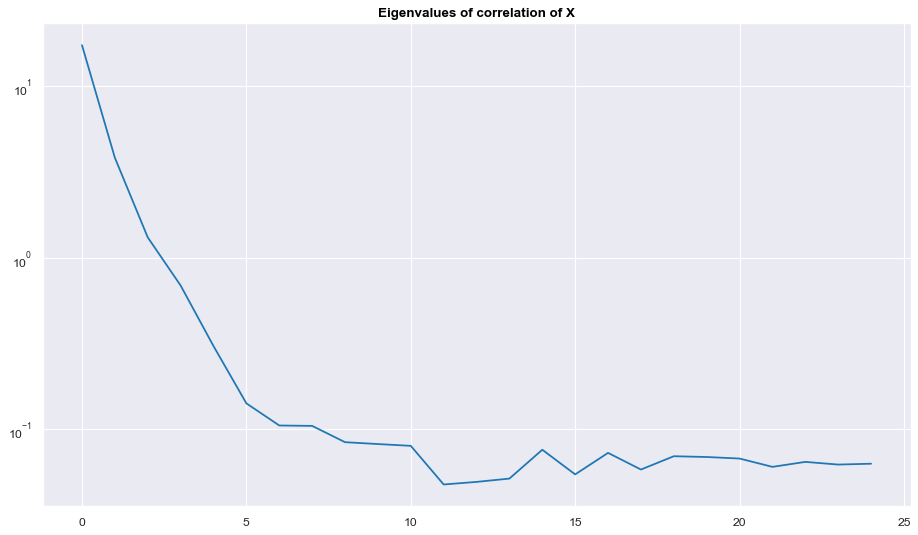

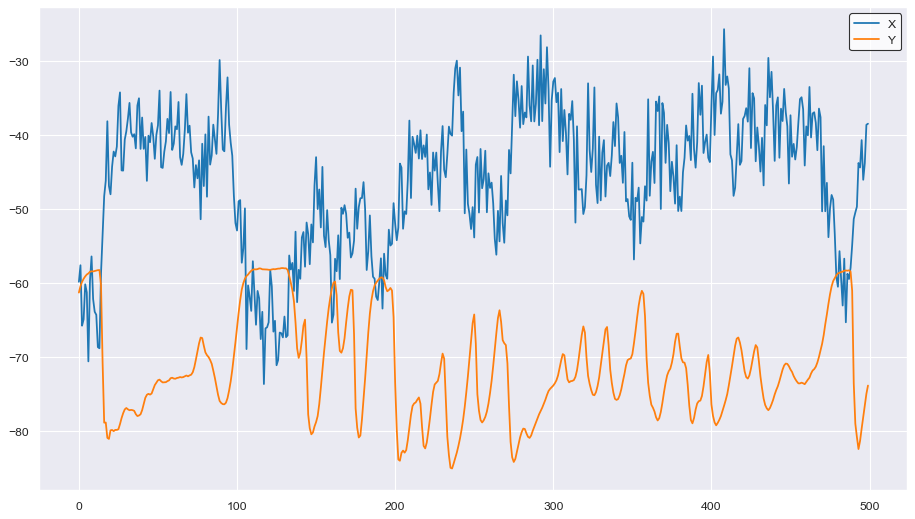

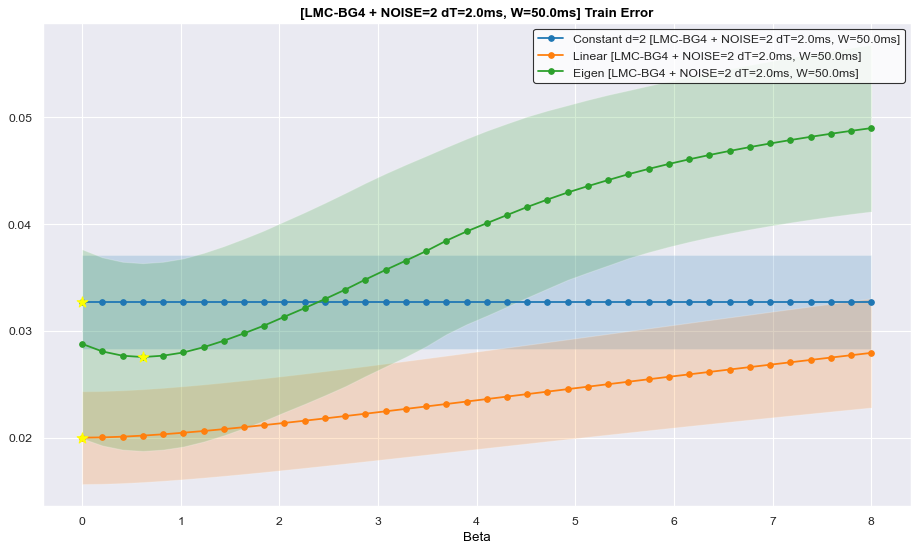

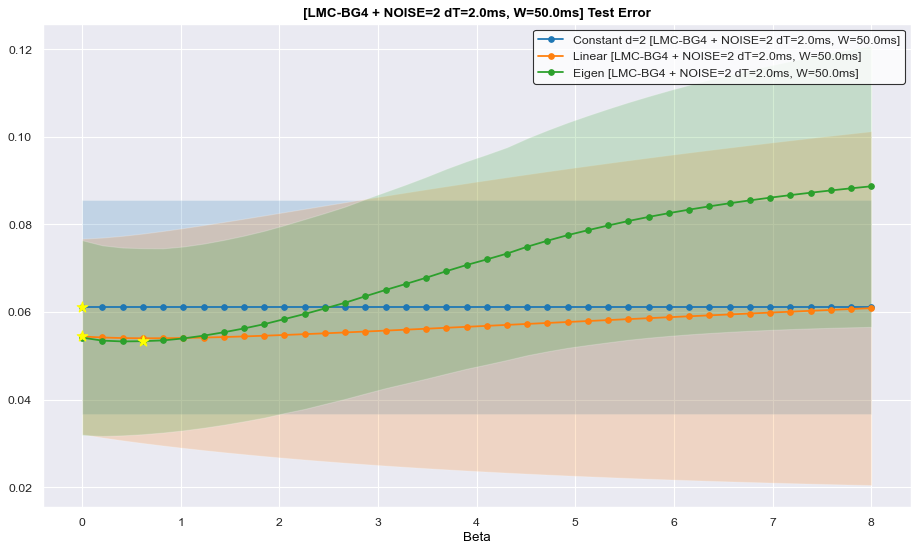

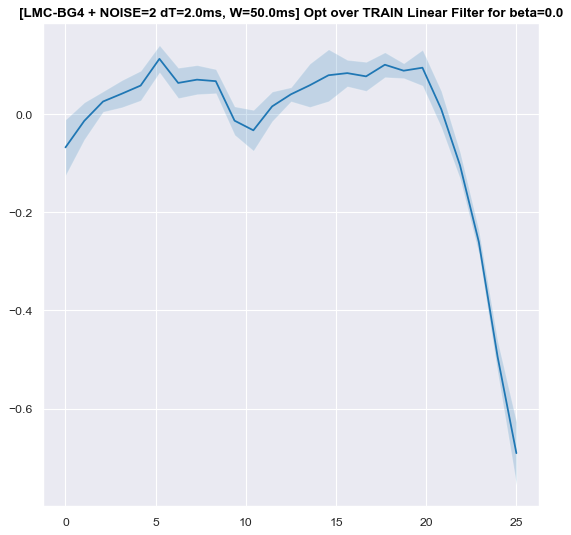

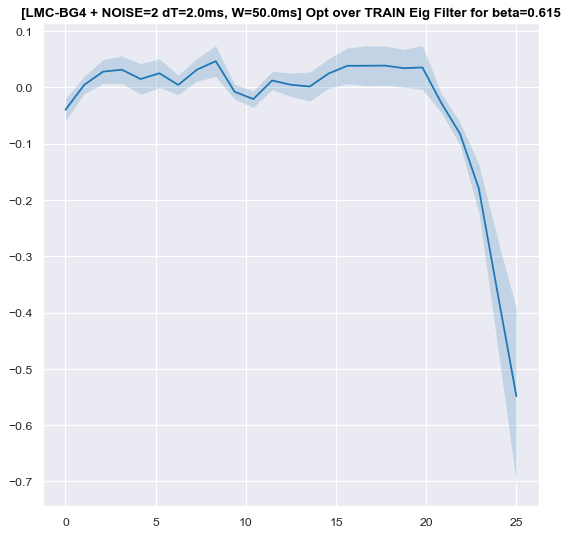

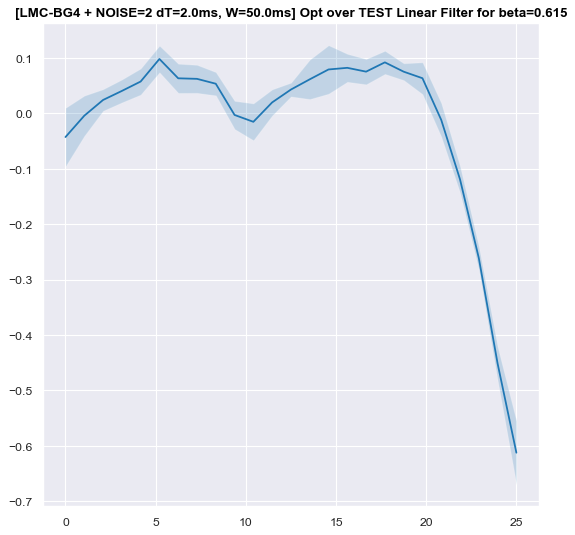

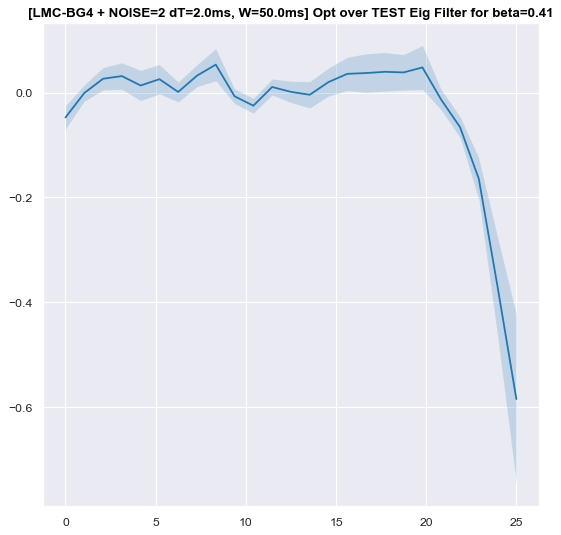

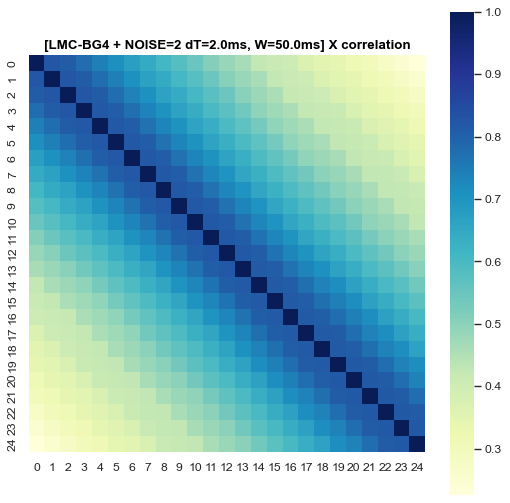

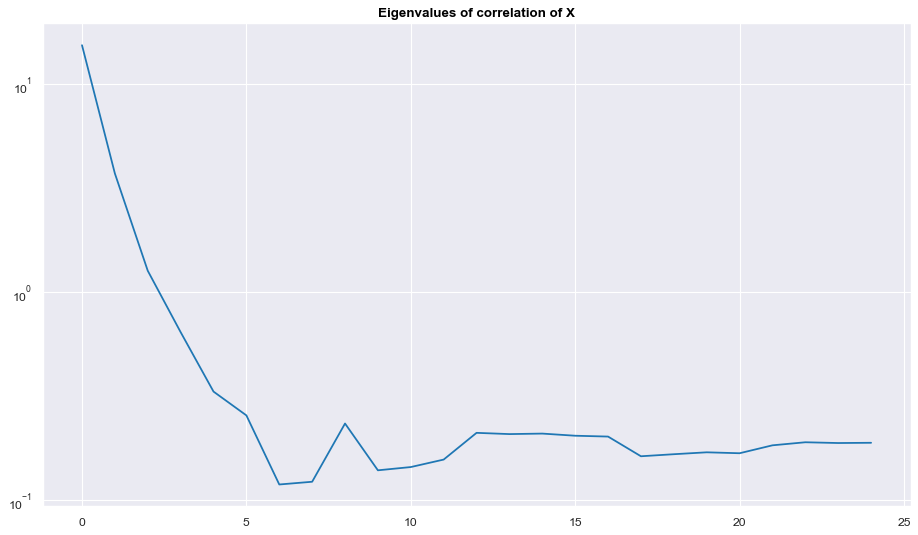

In [12]:
noise_results = []
for noise in [0.5,1,1.5,2]:
    data_str = f'LMC-BG4 + NOISE={noise}'
    d_method = 'mean'
    factor = 20
    dim = 25
    betas = np.linspace(0,8,40)
    X = preprocess(resPH, factor=factor, method=d_method)
    Y = preprocess(res4, factor=factor, method=d_method) 
    X += noise * np.random.normal(size=len(X), scale=noise)

    time_window = round( dim*(TIME/len(X))*1000, 3)
    dT = 1/len(X)*1000
    time_str = f'dT={dT}ms, W={time_window}ms'
    title = f'[{data_str} {time_str}]'


    model = ConstantModel(f'Constant d=2 {title}')
    res = train_test_method(X, Y, model, 2, betas=betas)
    C2_Results = Results(model.name, *res)

    model = LinearModel(f'Linear {title}')
    res = train_test_method(X, Y, model, dim, betas=betas)
    Lin50_Results = Results(model.name, *res)

    model = EigenModel(f'Eigen {title}')
    res = train_test_method(X, Y, model, dim, betas=betas)
    Eig50_Results = Results(model.name, *res)

    cur_results = [C2_Results, Lin50_Results, Eig50_Results]
    noise_results.extend(cur_results)

    # plotting
    plt.plot(X, label='X'); plt.plot(Y, label='Y'); plt.legend(); plt.show()
    plot_beta_errs(cur_results, title=title)
    plot_filter(*Lin50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Linear')
    plot_filter(*Eig50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Eig')
    plot_filter(*Lin50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Linear')
    plot_filter(*Eig50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Eig')
    # plot_spectrum(Eig50_Results.get_avg_spectrum(), title=f'{title} beta={round(Eig50_Results.get_opt_beta(),3)}')
    plot_self_corr(X, dim, title=title)